What is Machine Learning?

    Machine Learning (ML) is a subset of artificial intelligence that enables systems to learn from data and improve performance over time without being explicitly programmed.

Why ML for Embedded Systems?

    Embedded systems often deal with real-time data from sensors and require intelligent decision-making capabilities. 
    
    ML enables these systems to adapt to changing environments and perform tasks like prediction, classification, and anomaly detection.

Techniques for data collection and sourcing in embedded environments

    Let's assume we're working with a common embedded sensor setup involving a temperature sensor and an accelerometer using an edge device such as a Raspberry Pi.

Data Collection and Preprocessing in Embedded Environments
Setup:

    We'll simulate data collection from a temperature sensor and an accelerometer.
    The example will include data collection, basic preprocessing, and handling missing values.

Step 1: Data Collection

    In this example, we'll use the random module to simulate sensor readings from a temperature sensor and an accelerometer to mimic real-time data collection in an embedded environment.

In [22]:
import random
import time
import pandas as pd
import numpy as np

In [24]:
help(random.uniform)

Help on method uniform in module random:

uniform(a, b) method of random.Random instance
    Get a random number in the range [a, b) or [a, b] depending on rounding.



In [25]:
# Simulate real-time data collection for embedded sensors
def collect_sensor_data(num_samples=50):
    data = {
        'timestamp': [],
        'temperature': [],
        'acceleration_x': [],
        'acceleration_y': [],
        'acceleration_z': []
    }

    for _ in range(num_samples):
        # Simulate real-time data collection with a delay
        data['timestamp'].append(time.time())

        # Simulate temperature sensor reading (in degrees Celsius)
        temp = round(random.uniform(20.0, 30.0), 2)
        data['temperature'].append(temp)

        # Simulate accelerometer readings (in m/s^2)
        acc_x = round(random.uniform(-2.0, 2.0), 2)
        acc_y = round(random.uniform(-2.0, 2.0), 2)
        acc_z = round(random.uniform(-9.8, -9.5), 2)  # Simulating gravity along z-axis
        data['acceleration_x'].append(acc_x)
        data['acceleration_y'].append(acc_y)
        data['acceleration_z'].append(acc_z)

        # Introduce a delay to simulate real-time data collection
        time.sleep(0.1)  # Collect data every 0.1 seconds

    # Convert data to a DataFrame
    sensor_data_df = pd.DataFrame(data)
    return sensor_data_df


In [27]:
# Collect sensor data
sensor_data_df = collect_sensor_data()
print("Collected Sensor Data:")
print(sensor_data_df.head(10))
print(sensor_data_df.tail(10))

Collected Sensor Data:
      timestamp  temperature  acceleration_x  acceleration_y  acceleration_z
0  1.728906e+09        23.43            1.49           -0.17           -9.63
1  1.728906e+09        26.65           -0.85           -1.23           -9.51
2  1.728906e+09        20.61           -0.22           -1.51           -9.61
3  1.728906e+09        25.45            0.09           -0.19           -9.71
4  1.728906e+09        29.73           -1.38           -0.22           -9.63
5  1.728906e+09        28.04            1.66           -0.19           -9.50
6  1.728906e+09        22.73            0.99            1.14           -9.78
7  1.728906e+09        29.20            1.82            1.84           -9.66
8  1.728906e+09        27.64           -1.42            1.71           -9.77
9  1.728906e+09        27.13           -1.86           -0.43           -9.64
       timestamp  temperature  acceleration_x  acceleration_y  acceleration_z
40  1.728906e+09        28.61           -1.24       

Step 2: Data Preprocessing

    Once data is collected, the next step is to preprocess it for use in machine learning models. This includes handling missing values, normalizing data, and feature extraction.

1. Handling Missing Values

    Simulate missing values in the collected data and apply techniques to handle them.

In [29]:
# Introduce some missing values for demonstration purposes
sensor_data_df.loc[5, 'temperature'] = np.nan

sensor_data_df.loc[10, 'acceleration_x'] = np.nan

print("\nSensor Data with Missing Values:")

print(sensor_data_df.head(12))

sensor_data_df.info()


Sensor Data with Missing Values:
       timestamp  temperature  acceleration_x  acceleration_y  acceleration_z
0   1.728906e+09        23.43            1.49           -0.17           -9.63
1   1.728906e+09        26.65           -0.85           -1.23           -9.51
2   1.728906e+09        20.61           -0.22           -1.51           -9.61
3   1.728906e+09        25.45            0.09           -0.19           -9.71
4   1.728906e+09        29.73           -1.38           -0.22           -9.63
5   1.728906e+09          NaN            1.66           -0.19           -9.50
6   1.728906e+09        22.73            0.99            1.14           -9.78
7   1.728906e+09        29.20            1.82            1.84           -9.66
8   1.728906e+09        27.64           -1.42            1.71           -9.77
9   1.728906e+09        27.13           -1.86           -0.43           -9.64
10  1.728906e+09        23.78             NaN           -0.73           -9.51
11  1.728906e+09        25.31 

In [30]:
# Handle missing values by imputing with the mean of the column
sensor_data_df['temperature'].fillna(sensor_data_df['temperature'].mean(), inplace=True)
sensor_data_df['acceleration_x'].fillna(sensor_data_df['acceleration_x'].mean(), inplace=True)

print("\nSensor Data After Handling Missing Values:")
print(sensor_data_df.head(12))


Sensor Data After Handling Missing Values:
       timestamp  temperature  acceleration_x  acceleration_y  acceleration_z
0   1.728906e+09    23.430000        1.490000           -0.17           -9.63
1   1.728906e+09    26.650000       -0.850000           -1.23           -9.51
2   1.728906e+09    20.610000       -0.220000           -1.51           -9.61
3   1.728906e+09    25.450000        0.090000           -0.19           -9.71
4   1.728906e+09    29.730000       -1.380000           -0.22           -9.63
5   1.728906e+09    25.227143        1.660000           -0.19           -9.50
6   1.728906e+09    22.730000        0.990000            1.14           -9.78
7   1.728906e+09    29.200000        1.820000            1.84           -9.66
8   1.728906e+09    27.640000       -1.420000            1.71           -9.77
9   1.728906e+09    27.130000       -1.860000           -0.43           -9.64
10  1.728906e+09    23.780000       -0.209592           -0.73           -9.51
11  1.728906e+09    

2. Normalizing Data

    Normalizing sensor data ensures all features are on a similar scale, which helps machine learning algorithms converge faster.

In [31]:
from sklearn.preprocessing import MinMaxScaler

help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [33]:
# Normalizing temperature and acceleration data using Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#help(scaler.fit_transform)

sensor_data_df[['temperature', 'acceleration_x', 'acceleration_y', 'acceleration_z']] = scaler.fit_transform(
    sensor_data_df[['temperature', 'acceleration_x', 'acceleration_y', 'acceleration_z']]
)
print("\nNormalized Sensor Data:")

print(sensor_data_df.head(10))


Normalized Sensor Data:
      timestamp  temperature  acceleration_x  acceleration_y  acceleration_z
0  1.728906e+09     0.351184        0.874674        0.442159        0.566667
1  1.728906e+09     0.682801        0.263708        0.169666        0.966667
2  1.728906e+09     0.060762        0.428198        0.097686        0.633333
3  1.728906e+09     0.559217        0.509138        0.437018        0.300000
4  1.728906e+09     1.000000        0.125326        0.429306        0.566667
5  1.728906e+09     0.536266        0.919060        0.437018        1.000000
6  1.728906e+09     0.279094        0.744125        0.778920        0.066667
7  1.728906e+09     0.945417        0.960836        0.958869        0.466667
8  1.728906e+09     0.784758        0.114883        0.925450        0.100000
9  1.728906e+09     0.732235        0.000000        0.375321        0.533333


Step 3: Feature Extraction for Embedded Systems

    Extract additional features from the accelerometer data, such as the magnitude of acceleration, which could be used as an input feature in machine learning models.


In [34]:
# Calculate the magnitude of acceleration from x, y, and z components
sensor_data_df['acceleration_magnitude'] = np.sqrt(
    sensor_data_df['acceleration_x']**2 +
    sensor_data_df['acceleration_y']**2 +
    sensor_data_df['acceleration_z']**2
)
print("\nSensor Data with Extracted Feature (Acceleration Magnitude):")
print(sensor_data_df.head(10))


Sensor Data with Extracted Feature (Acceleration Magnitude):
      timestamp  temperature  acceleration_x  acceleration_y  acceleration_z  \
0  1.728906e+09     0.351184        0.874674        0.442159        0.566667   
1  1.728906e+09     0.682801        0.263708        0.169666        0.966667   
2  1.728906e+09     0.060762        0.428198        0.097686        0.633333   
3  1.728906e+09     0.559217        0.509138        0.437018        0.300000   
4  1.728906e+09     1.000000        0.125326        0.429306        0.566667   
5  1.728906e+09     0.536266        0.919060        0.437018        1.000000   
6  1.728906e+09     0.279094        0.744125        0.778920        0.066667   
7  1.728906e+09     0.945417        0.960836        0.958869        0.466667   
8  1.728906e+09     0.784758        0.114883        0.925450        0.100000   
9  1.728906e+09     0.732235        0.000000        0.375321        0.533333   

   acceleration_magnitude  
0                1.132109  
1

Final Output

    The resulting sensor_data_df contains preprocessed data, ready to be used for training a machine learning model on an embedded system.

    Key Points Demonstrated:
    Data Collection: Simulated real-time data collection from temperature and accelerometer sensors.

    Handling Missing Values: Imputed missing values using the mean.

    Data Normalization: Scaled the data using Min-Max Scaling.

    Feature Extraction: Calculated the magnitude of acceleration as an additional feature.

Data cleaning methods and handling noisy data 

    1.	Removing or filtering out noisy data.
    2.	Handling missing values.
    3.	Smoothing the data to reduce noise.

Setup: Simulated Sensor Data Collection
We will simulate noisy data collected from a temperature sensor and demonstrate how to clean and preprocess this data.

Original Noisy Data with Missing Values:
            timestamp  temperature
0 2023-01-01 00:00:00        25.15
1 2023-01-01 00:01:00        25.26
2 2023-01-01 00:02:00        25.02
3 2023-01-01 00:03:00        22.90
4 2023-01-01 00:04:00        24.89
5 2023-01-01 00:05:00        24.67
6 2023-01-01 00:06:00        23.22
7 2023-01-01 00:07:00          NaN
8 2023-01-01 00:08:00        25.12
9 2023-01-01 00:09:00        25.28


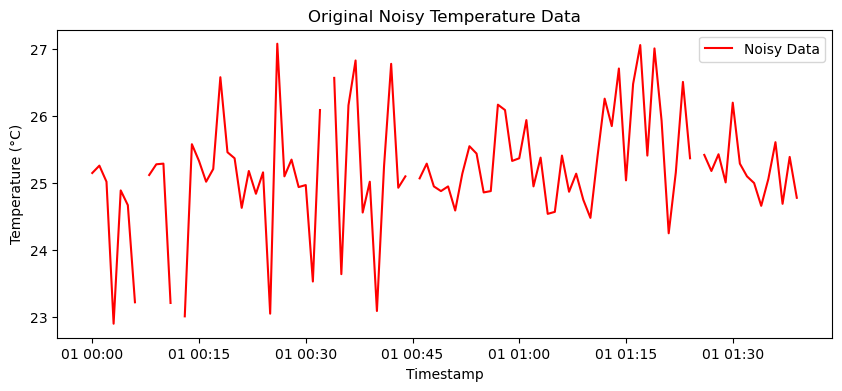

In [8]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Simulate data collection from a temperature sensor
def generate_noisy_temperature_data(num_samples=100):
    data = {
        'timestamp': pd.date_range(start='2023-01-01', periods=num_samples, freq='T'),  # 1-minute intervals
        'temperature': []
    }

    # Generate temperature data with some noise
    base_temperature = 25  # Assume a base temperature of 25°C
    for _ in range(num_samples):
        # Introduce some noise in temperature readings
        temp = base_temperature + random.uniform(-0.5, 0.5) + random.choice([0, random.uniform(-2, 2)])
        data['temperature'].append(round(temp, 2))

    # Convert data to a DataFrame
    temperature_df = pd.DataFrame(data)

    # Introduce some missing values randomly
    for _ in range(5):
        temperature_df.loc[random.randint(0, num_samples - 1), 'temperature'] = np.nan

    return temperature_df

# Generate the simulated temperature data
temperature_df = generate_noisy_temperature_data()

print("Original Noisy Data with Missing Values:")
print(temperature_df.head(10))

# Plot the original noisy data
plt.figure(figsize=(10, 4))
plt.plot(temperature_df['timestamp'], temperature_df['temperature'], label='Noisy Data', color='red')
plt.title("Original Noisy Temperature Data")
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

Step 1: Handling Missing Values

    Let's handle the missing values using different techniques.

In [9]:
# Method 1: Impute missing values with the mean

temperature_df['temperature_mean_imputed'] = temperature_df['temperature'].fillna(temperature_df['temperature'].mean())

temperature_df.head(10)

,timestamp,temperature,temperature_mean_imputed
0,2023-01-01 00:00:00,25.15,25.150000
1,2023-01-01 00:01:00,25.26,25.260000
2,2023-01-01 00:02:00,25.02,25.020000
3,2023-01-01 00:03:00,22.90,22.900000
4,2023-01-01 00:04:00,24.89,24.890000
5,2023-01-01 00:05:00,24.67,24.670000
6,2023-01-01 00:06:00,23.22,23.220000
7,2023-01-01 00:07:00,NaN,25.192316
8,2023-01-01 00:08:00,25.12,25.120000
9,2023-01-01 00:09:00,25.28,25.280000


In [12]:
# Method 2: Forward fill method (using the last valid observation to fill missing data)

temperature_df['temperature_forward_fill'] = temperature_df['temperature'].fillna(method='ffill')

temperature_df.head(10)

/var/folders/j9/t7f_l7rd20101rcpcynrvqyh0000gn/T/ipykernel_63818/4003113055.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  temperature_df['temperature_forward_fill'] = temperature_df['temperature'].fillna(method='ffill')


,timestamp,temperature,temperature_mean_imputed,temperature_forward_fill
0,2023-01-01 00:00:00,25.15,25.150000,25.15
1,2023-01-01 00:01:00,25.26,25.260000,25.26
2,2023-01-01 00:02:00,25.02,25.020000,25.02
3,2023-01-01 00:03:00,22.90,22.900000,22.90
4,2023-01-01 00:04:00,24.89,24.890000,24.89
5,2023-01-01 00:05:00,24.67,24.670000,24.67
6,2023-01-01 00:06:00,23.22,23.220000,23.22
7,2023-01-01 00:07:00,NaN,25.192316,23.22
8,2023-01-01 00:08:00,25.12,25.120000,25.12
9,2023-01-01 00:09:00,25.28,25.280000,25.28


In [13]:
# Method 2: Forward fill method (using the last valid observation to fill missing data)

temperature_df['temperature_forward_fill'] = temperature_df['temperature'].ffill()

temperature_df.head(10)

,timestamp,temperature,temperature_mean_imputed,temperature_forward_fill
0,2023-01-01 00:00:00,25.15,25.150000,25.15
1,2023-01-01 00:01:00,25.26,25.260000,25.26
2,2023-01-01 00:02:00,25.02,25.020000,25.02
3,2023-01-01 00:03:00,22.90,22.900000,22.90
4,2023-01-01 00:04:00,24.89,24.890000,24.89
5,2023-01-01 00:05:00,24.67,24.670000,24.67
6,2023-01-01 00:06:00,23.22,23.220000,23.22
7,2023-01-01 00:07:00,NaN,25.192316,23.22
8,2023-01-01 00:08:00,25.12,25.120000,25.12
9,2023-01-01 00:09:00,25.28,25.280000,25.28


In [16]:
# Method 3: Backward fill method (using the next valid observation to fill missing data)
temperature_df['temperature_backward_fill'] = temperature_df['temperature'].bfill()
temperature_df.head(10)

,timestamp,temperature,temperature_mean_imputed,temperature_forward_fill,temperature_backward_fill
0,2023-01-01 00:00:00,25.15,25.150000,25.15,25.15
1,2023-01-01 00:01:00,25.26,25.260000,25.26,25.26
2,2023-01-01 00:02:00,25.02,25.020000,25.02,25.02
3,2023-01-01 00:03:00,22.90,22.900000,22.90,22.90
4,2023-01-01 00:04:00,24.89,24.890000,24.89,24.89
5,2023-01-01 00:05:00,24.67,24.670000,24.67,24.67
6,2023-01-01 00:06:00,23.22,23.220000,23.22,23.22
7,2023-01-01 00:07:00,NaN,25.192316,23.22,25.12
8,2023-01-01 00:08:00,25.12,25.120000,25.12,25.12
9,2023-01-01 00:09:00,25.28,25.280000,25.28,25.28


In [18]:
# Method 3: Backward fill method (using the next valid observation to fill missing data)
temperature_df['temperature_backward_fill'] = temperature_df['temperature'].bfill()

print("\nData After Handling Missing Values:")
print(temperature_df[['timestamp', 'temperature', 'temperature_mean_imputed', 'temperature_forward_fill', 'temperature_backward_fill']].head(10))



Data After Handling Missing Values:
            timestamp  temperature  temperature_mean_imputed  \
0 2023-01-01 00:00:00        25.15                 25.150000   
1 2023-01-01 00:01:00        25.26                 25.260000   
2 2023-01-01 00:02:00        25.02                 25.020000   
3 2023-01-01 00:03:00        22.90                 22.900000   
4 2023-01-01 00:04:00        24.89                 24.890000   
5 2023-01-01 00:05:00        24.67                 24.670000   
6 2023-01-01 00:06:00        23.22                 23.220000   
7 2023-01-01 00:07:00          NaN                 25.192316   
8 2023-01-01 00:08:00        25.12                 25.120000   
9 2023-01-01 00:09:00        25.28                 25.280000   

   temperature_forward_fill  temperature_backward_fill  
0                     25.15                      25.15  
1                     25.26                      25.26  
2                     25.02                      25.02  
3                     22.90   

Step 2: Smoothing the Data to Handle Noisy Values

    We can use techniques such as moving average and median filtering to smooth out the noise in the data.

    1. Moving Average Filter
    The moving average smooths the data by taking the average of a fixed-size window of consecutive readings.

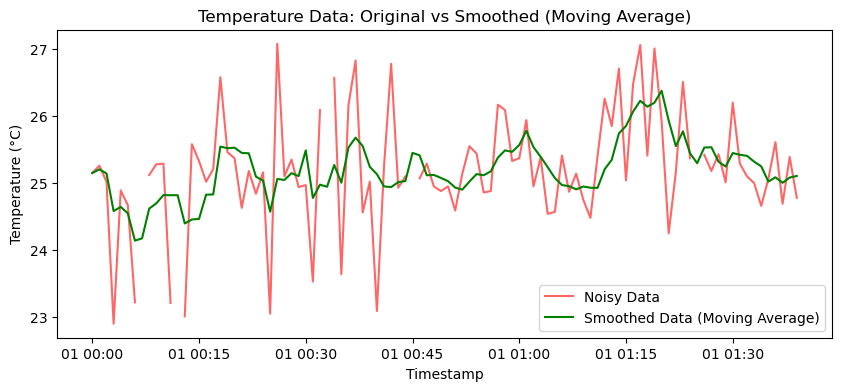

In [19]:
# Apply a moving average filter with a window size of 5
temperature_df['temperature_smoothed'] = temperature_df['temperature_mean_imputed'].rolling(window=5, min_periods=1).mean()

# Plot the original and smoothed data for comparison
plt.figure(figsize=(10, 4))
plt.plot(temperature_df['timestamp'], temperature_df['temperature'], label='Noisy Data', color='red', alpha=0.6)
plt.plot(temperature_df['timestamp'], temperature_df['temperature_smoothed'], label='Smoothed Data (Moving Average)', color='green')
plt.title("Temperature Data: Original vs Smoothed (Moving Average)")
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

2. Median Filter

    The median filter replaces each data point with the median of a fixed-size window, which helps eliminate spikes or outliers.

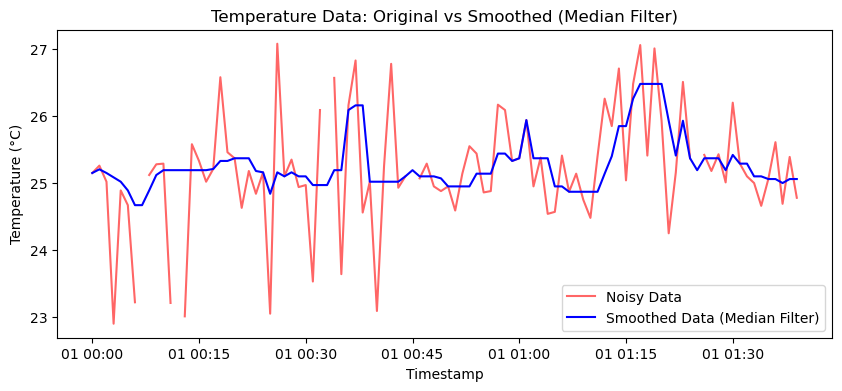

In [20]:
# Apply a median filter with a window size of 5
temperature_df['temperature_median_filtered'] = temperature_df['temperature_mean_imputed'].rolling(window=5, min_periods=1).median()
# Plot the original and median filtered data for comparison
plt.figure(figsize=(10, 4))
plt.plot(temperature_df['timestamp'], temperature_df['temperature'], label='Noisy Data', color='red', alpha=0.6)
plt.plot(temperature_df['timestamp'], temperature_df['temperature_median_filtered'], label='Smoothed Data (Median Filter)', color='blue')
plt.title("Temperature Data: Original vs Smoothed (Median Filter)")
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

Step 3: Removing Outliers

    Outliers can distort the results of machine learning models. We'll use the Z-score method to identify and remove outliers.


Data After Removing Outliers:
             timestamp  temperature  temperature_mean_imputed  \
0  2023-01-01 00:00:00        25.15                     25.15   
1  2023-01-01 00:01:00        25.26                     25.26   
2  2023-01-01 00:02:00        25.02                     25.02   
3  2023-01-01 00:03:00        22.90                     22.90   
4  2023-01-01 00:04:00        24.89                     24.89   
5  2023-01-01 00:05:00        24.67                     24.67   
6  2023-01-01 00:06:00        23.22                     23.22   
8  2023-01-01 00:08:00        25.12                     25.12   
9  2023-01-01 00:09:00        25.28                     25.28   
10 2023-01-01 00:10:00        25.29                     25.29   

    temperature_forward_fill  temperature_backward_fill  temperature_smoothed  \
0                      25.15                      25.15             25.150000   
1                      25.26                      25.26             25.205000   
2         

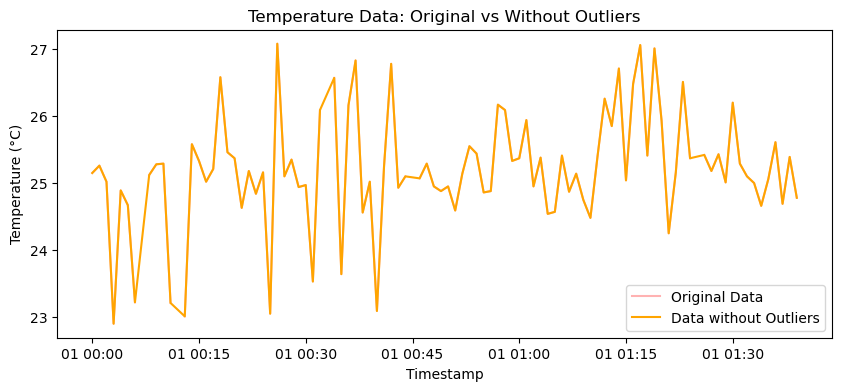

In [21]:
# Calculate the Z-scores
temperature_df['z_score'] = (temperature_df['temperature'] - temperature_df['temperature'].mean()) / temperature_df['temperature'].std()

# Remove data points with Z-scores greater than 3 or less than -3 (common threshold for outlier detection)
temperature_df_no_outliers = temperature_df[np.abs(temperature_df['z_score']) <= 3]
print("\nData After Removing Outliers:")
print(temperature_df_no_outliers.head(10))

# Plot the data after removing outliers
plt.figure(figsize=(10, 4))
plt.plot(temperature_df['timestamp'], temperature_df['temperature'], label='Original Data', color='red', alpha=0.3)
plt.plot(temperature_df_no_outliers['timestamp'], temperature_df_no_outliers['temperature'], label='Data without Outliers', color='orange')
plt.title("Temperature Data: Original vs Without Outliers")
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

Key Takeaways from the Example:

    1.Handling Missing Values: We used mean imputation, forward fill, and backward fill techniques to handle missing data points.

    2.Smoothing Noisy Data: The moving average and median filtering techniques were effective in reducing noise and smoothing the data.
    
    3.Outlier Removal: The Z-score method helped identify and remove outliers, ensuring cleaner and more reliable data for machine learning models.

    By applying these data cleaning techniques, you can ensure that the data used for training machine learning models in embedded systems is accurate, consistent, and free from noise, leading to better model performance and reliability.